In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import quandl
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Enter desired start and end dates

In [2]:
start = dt.datetime(2017, 3, 31)
end = dt.datetime.now()
num_months = (end.year - start.year) * 12 + (end.month - start.month)
print('Number of months in range:', num_months)

Number of months in range: 37


## Enter desired tickers

In [3]:
Long_Numerator = "JPM" # Enter whatever stocks you want to view
Short_Denominator = "BAC"

# World View

### PMI

In [4]:
df_PMI = quandl.get("ISM/MAN_PMI", authtoken="kFwyRwmqZyPsHBzdpNov")
df_PMI.rename(columns={'VALUE': "PMI"}, inplace=True)
df_PMI = df_PMI[::-1]
df_PMI = df_PMI[-num_months:]
df_PMI.head()

,PMI
Date,
1951-01-01,67.8
1950-12-01,67.1
1950-11-01,63.1
1950-10-01,59.2
1950-09-01,68.1


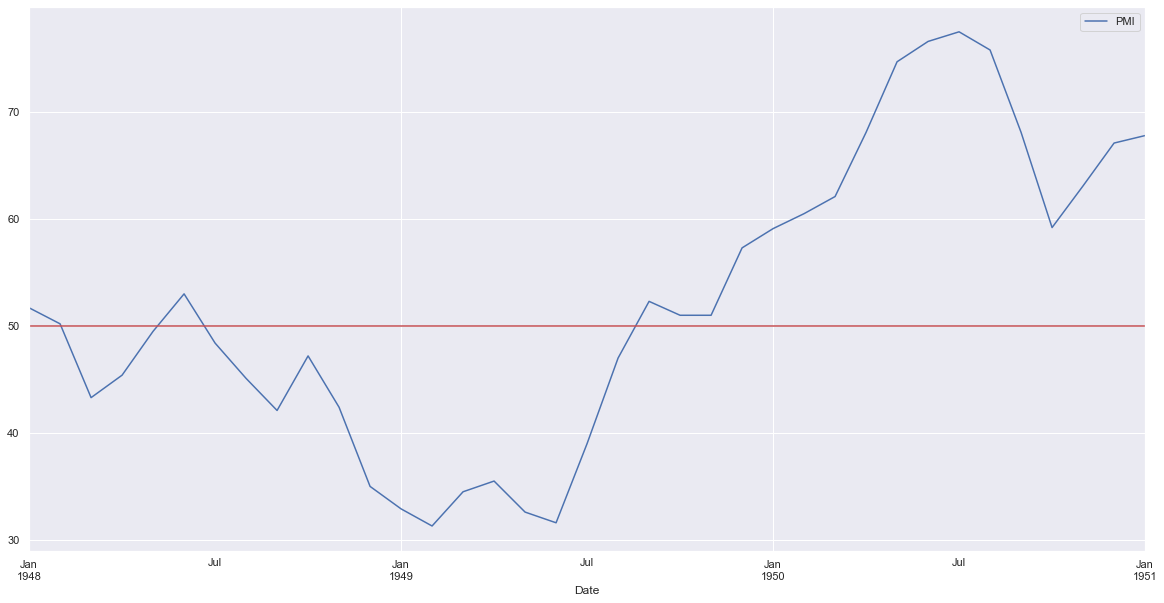

In [5]:
df_PMI.plot(figsize=(20, 10))
plt.axhline(50, color="r");

## NMI

In [6]:
df_NMI = quandl.get("ISM/NONMAN_NMI", authtoken="kFwyRwmqZyPsHBzdpNov")
df_NMI.rename(columns={'Index': "NMI"}, inplace=True)
df_NMI = df_NMI[::-1]
df_NMI = df_NMI[-num_months:]
df_NMI.head()

,NMI
Date,
2011-01-01,57.1
2010-12-01,57.0
2010-11-01,56.7
2010-10-01,55.3
2010-09-01,53.6


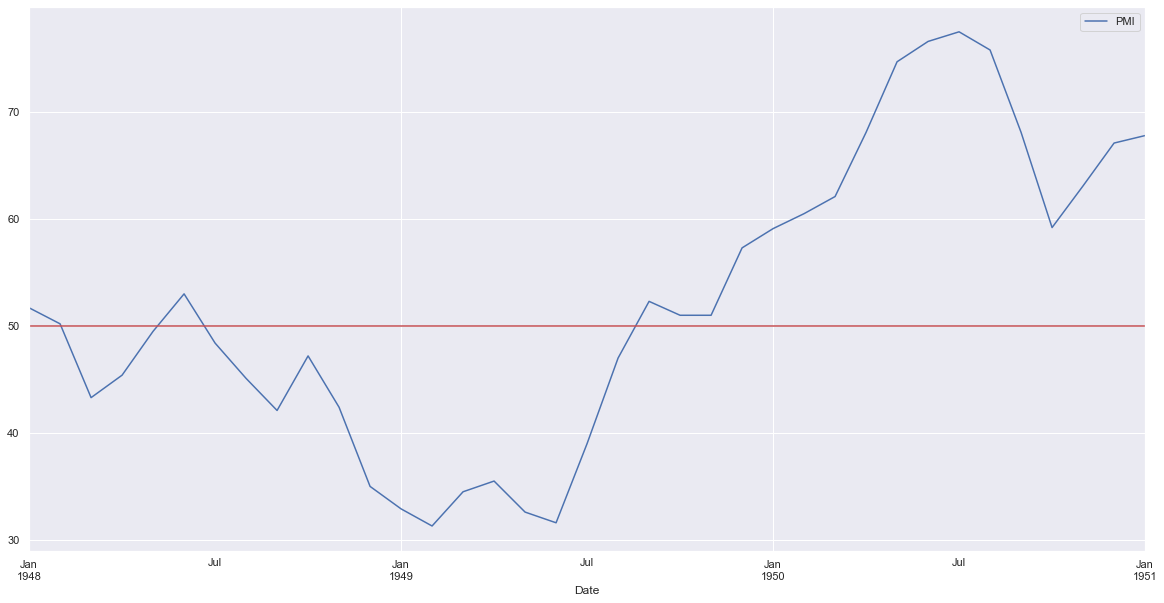

In [7]:
df_PMI.plot(figsize=(20, 10))
plt.axhline(50, color="r");

### UMCSI

In [8]:
df_UMCSI = quandl.get("UMICH/SOC1", authtoken="kFwyRwmqZyPsHBzdpNov")
df_UMCSI = df_UMCSI[::-1]
df_UMCSI.rename(columns={'Index': "UMCSI"}, inplace=True)
df_UMCSI = df_UMCSI[:num_months]
df_UMCSI.head()

,UMCSI
Date,
2020-02-29,101.0
2020-01-31,99.8
2019-12-31,99.3
2019-11-30,96.8
2019-10-31,95.5


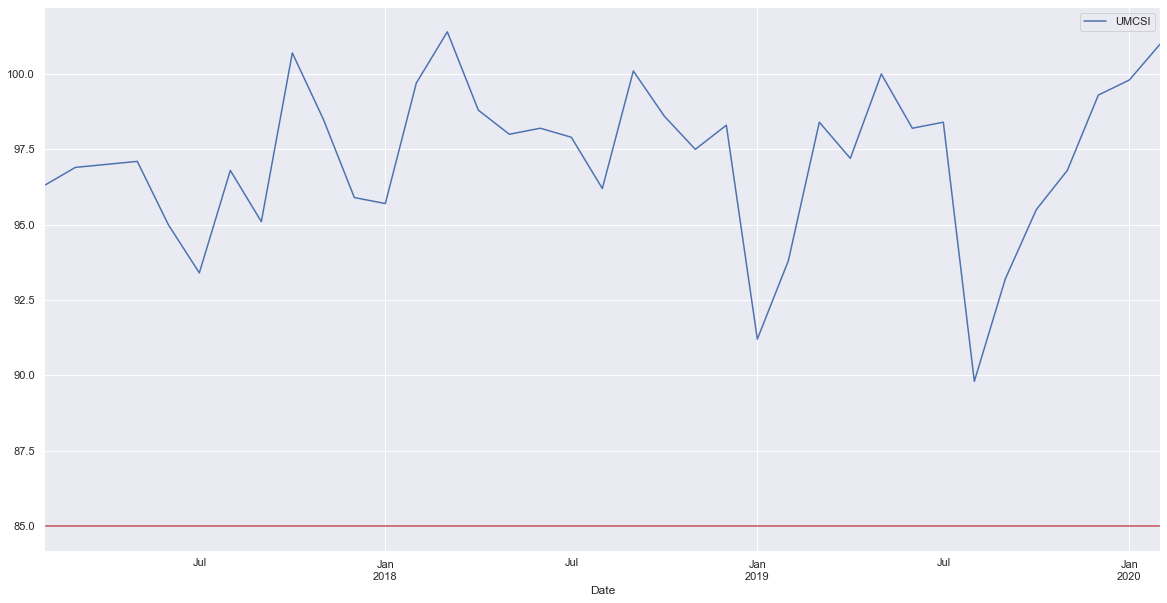

In [9]:
df_UMCSI.plot(figsize=(20, 10))
plt.axhline(85, color="r");

## Housing Starts

In [10]:
df_house_starts = quandl.get("FRED/HOUST", authtoken="kFwyRwmqZyPsHBzdpNov")
df_house_starts = df_house_starts[::-1]
df_house_starts.rename(columns={'Value': "Housing Starts"}, inplace=True)
df_house_starts = df_house_starts[:num_months]
df_house_starts.head()

,Housing Starts
Date,
2020-02-01,1599.0
2020-01-01,1624.0
2019-12-01,1601.0
2019-11-01,1381.0
2019-10-01,1340.0


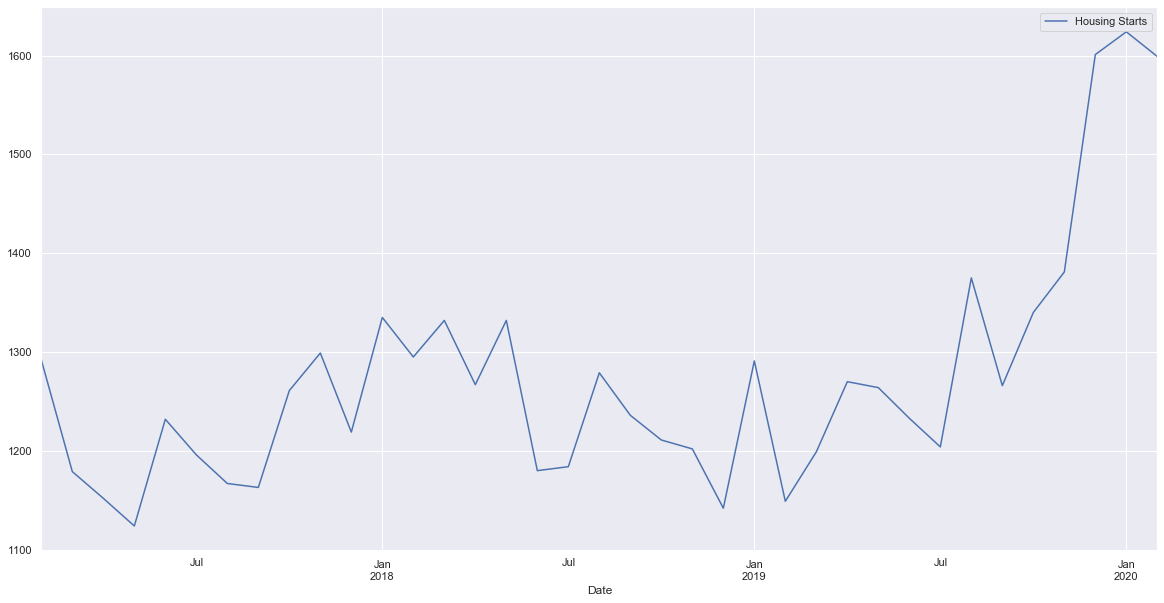

In [11]:
df_house_starts.plot(figsize=(20, 10));

## Money Supply (M2)

In [12]:
df_m2 = quandl.get("FRED/HOUST", authtoken="kFwyRwmqZyPsHBzdpNov")
df_m2 = df_m2[::-1]
df_m2.rename(columns={'Value': "M2"}, inplace=True)
df_m2 = df_m2[:num_months]
df_m2.head()

,M2
Date,
2020-02-01,1599.0
2020-01-01,1624.0
2019-12-01,1601.0
2019-11-01,1381.0
2019-10-01,1340.0


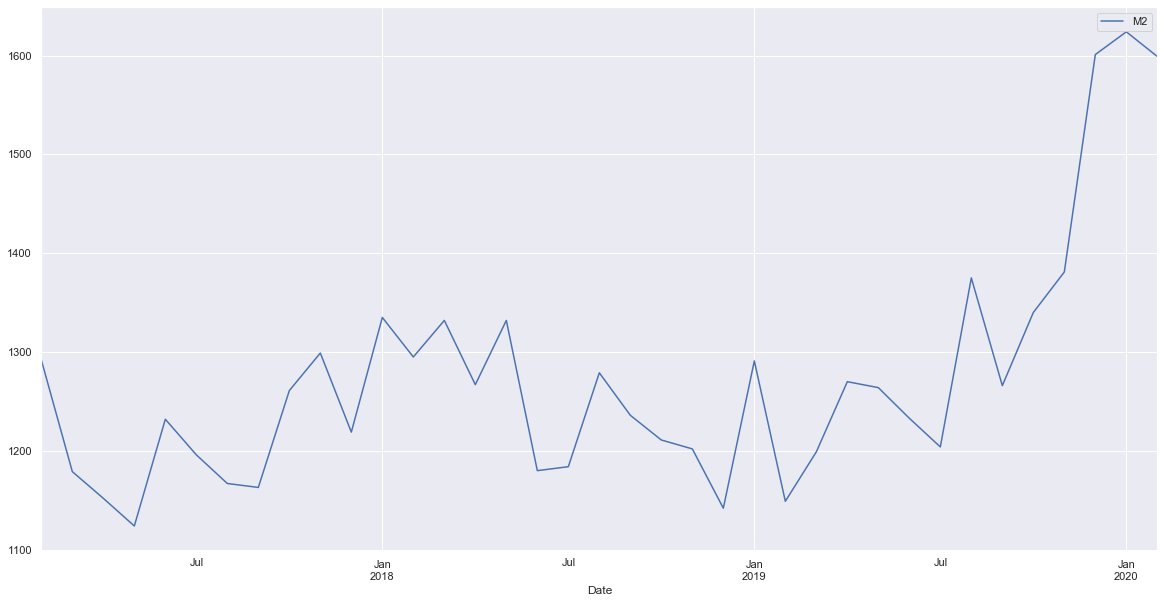

In [13]:
df_m2.plot(figsize=(20, 10));

## Unemployment Rate

In [14]:
df_unemployment = quandl.get("FRED/UNRATE", authtoken="kFwyRwmqZyPsHBzdpNov")
df_unemployment = df_unemployment[::-1]
df_unemployment.rename(columns={'Value': "Unemployment"}, inplace=True)
df_unemployment = df_unemployment[:num_months]
df_unemployment.head()

,Unemployment
Date,
2020-02-01,3.5
2020-01-01,3.6
2019-12-01,3.5
2019-11-01,3.5
2019-10-01,3.6


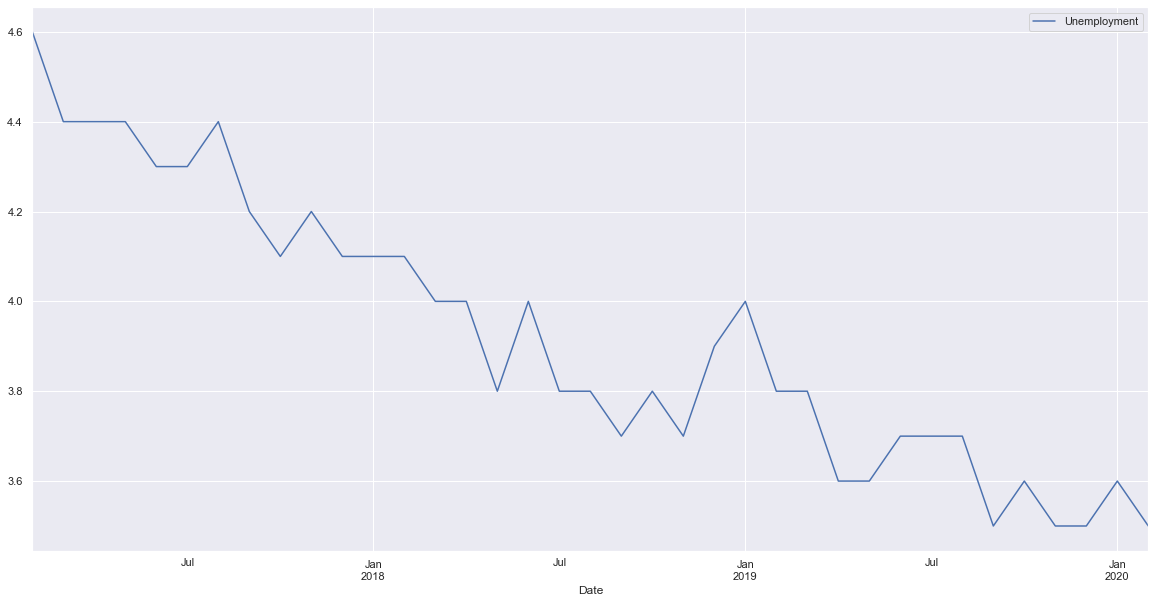

In [15]:
df_unemployment.plot(figsize=(20, 10));

## Non Farm Payroll

In [16]:
df_nonfarm = quandl.get("FRED/PAYEMS", authtoken="kFwyRwmqZyPsHBzdpNov")
df_nonfarm = df_nonfarm[::-1]
df_nonfarm.rename(columns={'Value': "NonFarm Payroll"}, inplace=True)
df_nonfarm = df_nonfarm[:num_months]
df_nonfarm.head()

,NonFarm Payroll
Date,
2020-02-01,152544.0
2020-01-01,152271.0
2019-12-01,151998.0
2019-11-01,151814.0
2019-10-01,151553.0


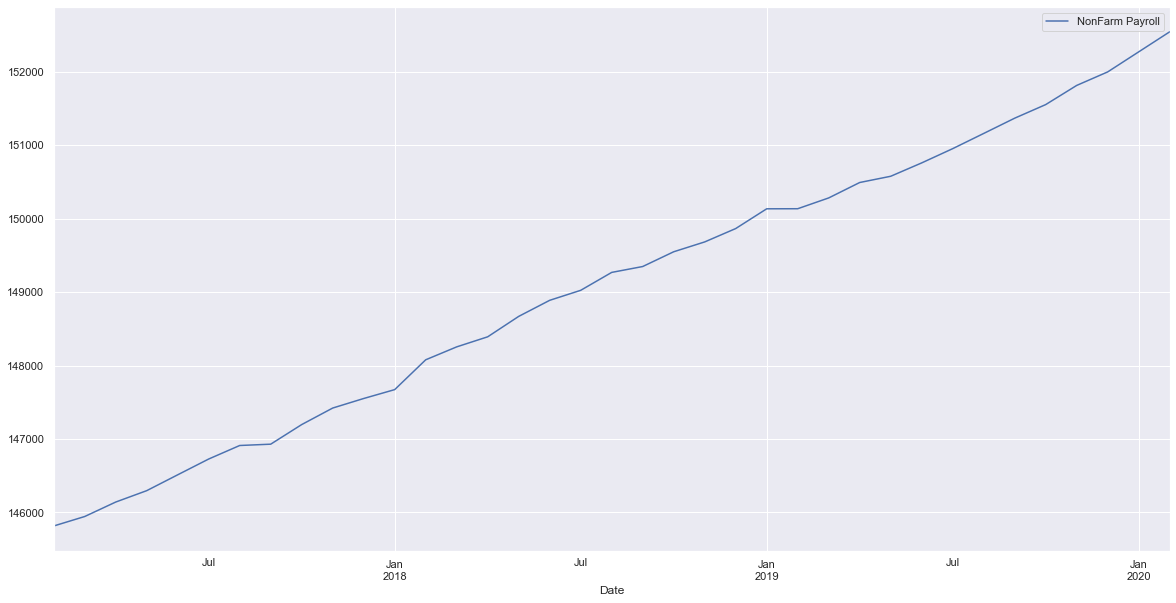

In [17]:
df_nonfarm.plot(figsize=(20, 10));

## Consumer Price Index

In [18]:
df_market = quandl.get("YALE/SPCOMP", authtoken="kFwyRwmqZyPsHBzdpNov")
df_market = df_market[::-1]
df_market = df_market[:num_months]
df_market.drop(['S&P Composite', 'Dividend', 'Earnings', 'Long Interest Rate', 'Real Price', 'Real Dividend', 'Real Earnings'], 1, inplace=True)
df_market.rename(columns={'Cyclically Adjusted PE Ratio': "PE"}, inplace=True)
df_market['CPI'].head()

Year
2019-12-31    257.139
2019-11-30    257.208
2019-10-31    257.346
2019-09-30    256.759
2019-08-31    256.558
Name: CPI, dtype: float64

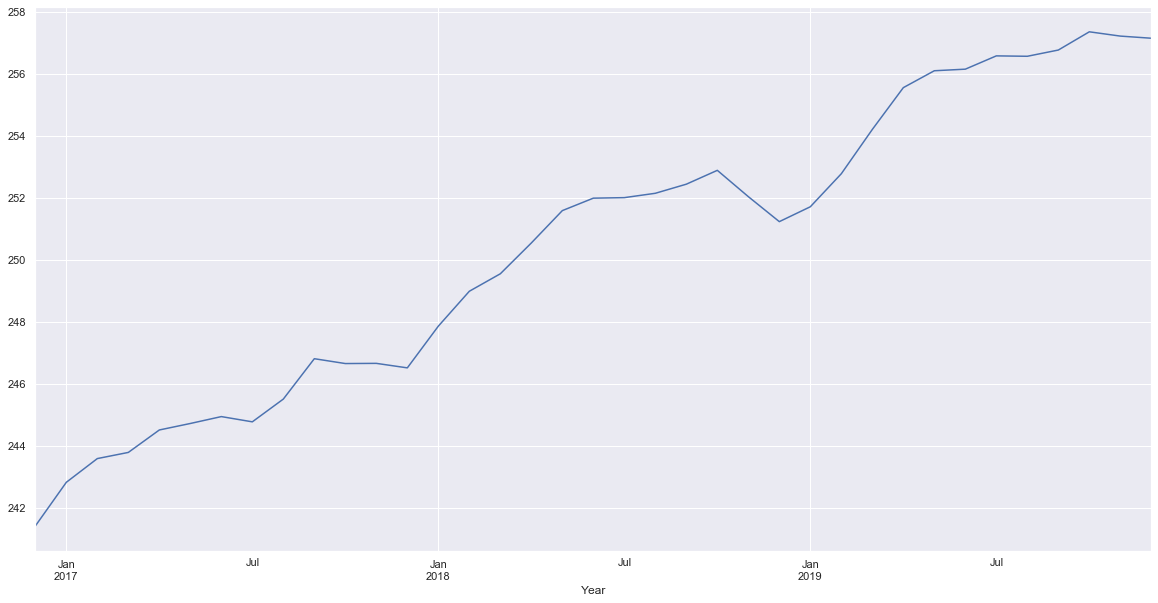

In [19]:
df_market['CPI'].plot(figsize=(20, 10));

## Market PE

In [20]:
df_market['PE'].head()

Year
2019-12-31    30.913600
2019-11-30    29.911395
2019-10-31    28.840889
2019-09-30    29.229401
2019-08-31    28.705358
Name: PE, dtype: float64

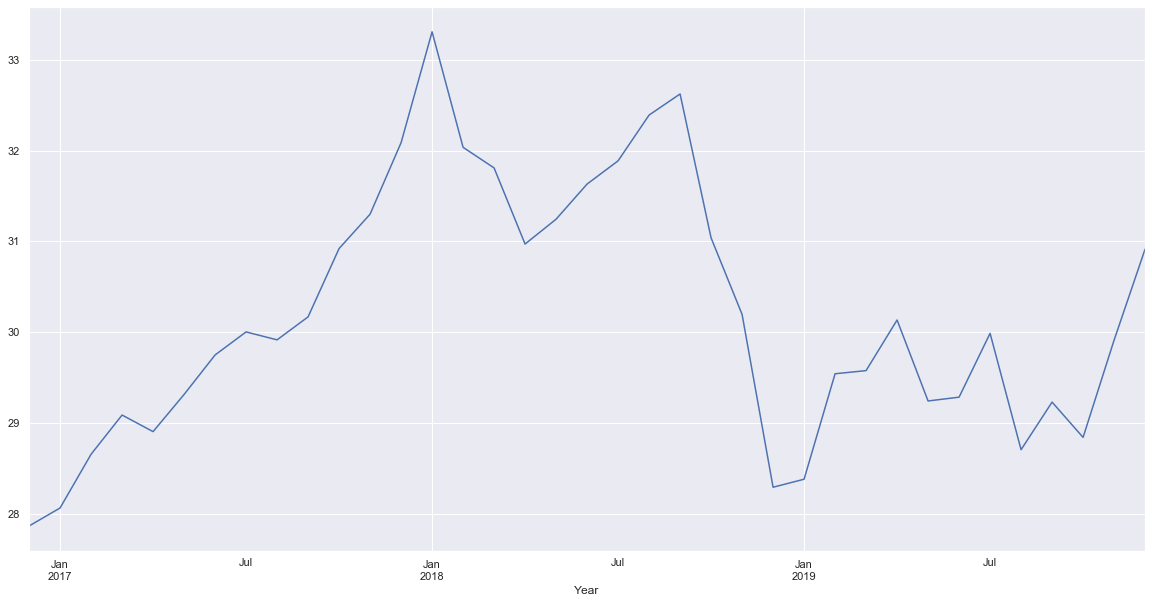

In [21]:
df_market['PE'].plot(figsize=(20, 10));

## S&P500 

In [22]:
df_SP500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_SP500.rename(columns={'Adj Close': "SP500"}, inplace=True)
df_SP500 = df_SP500[::-1]
df_SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
df_SP500.head()

,SP500
Date,
2020-04-02,2500.199951
2020-04-01,2470.500000
2020-03-31,2584.590088
2020-03-30,2626.649902
2020-03-27,2541.469971


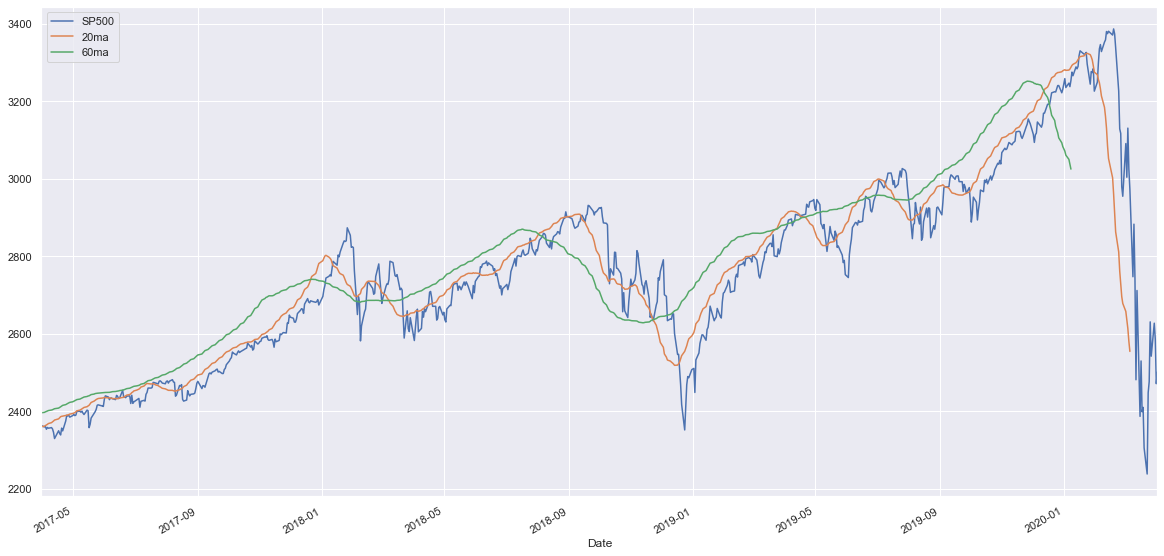

In [23]:
df_SP500['20ma'] = df_SP500['SP500'].rolling(window=20).mean()
df_SP500['60ma'] = df_SP500['SP500'].rolling(window=60).mean()

df_SP500.plot(figsize=(20, 10));

## VIX

In [24]:
df_VIX = web.DataReader("^VIX", 'yahoo', start, end)
df_VIX = df_VIX[::-1]
df_VIX.rename(columns={'Adj Close': "VIX"}, inplace=True)
df_VIX.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
df_VIX.head()

,VIX
Date,
2020-04-02,52.220001
2020-04-01,57.060001
2020-03-31,53.540001
2020-03-30,57.080002
2020-03-27,65.540001


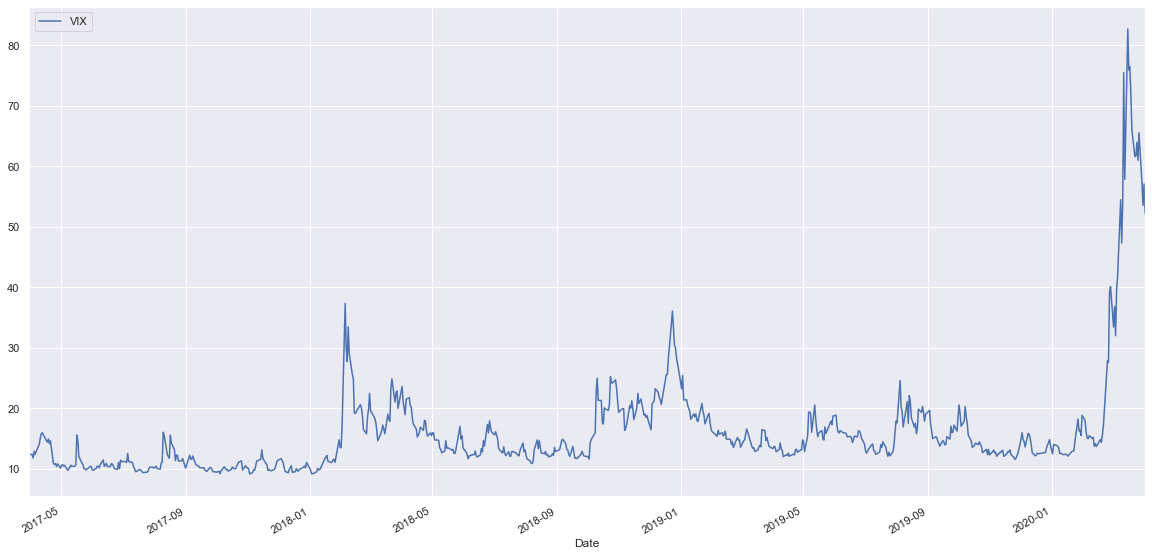

In [25]:
df_VIX.plot(figsize=(20, 10));

## Yield Curve (10-year minus 2-year)

In [26]:
df_treasuryRates = quandl.get("USTREASURY/YIELD", authtoken="kFwyRwmqZyPsHBzdpNov")
df_treasuryRates = df_treasuryRates[::-1]
df_treasuryRates['TenMinusTwo'] = df_treasuryRates['10 YR'] - df_treasuryRates['2 YR']
df_treasuryRates.drop(['1 MO', '2 MO', '3 MO', '6 MO', '1 YR', '2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '20 YR', '30 YR'], 1, inplace=True)
df_treasuryRates.head()

,TenMinusTwo
Date,
2020-04-01,0.39
2020-03-31,0.47
2020-03-30,0.47
2020-03-27,0.47
2020-03-26,0.53


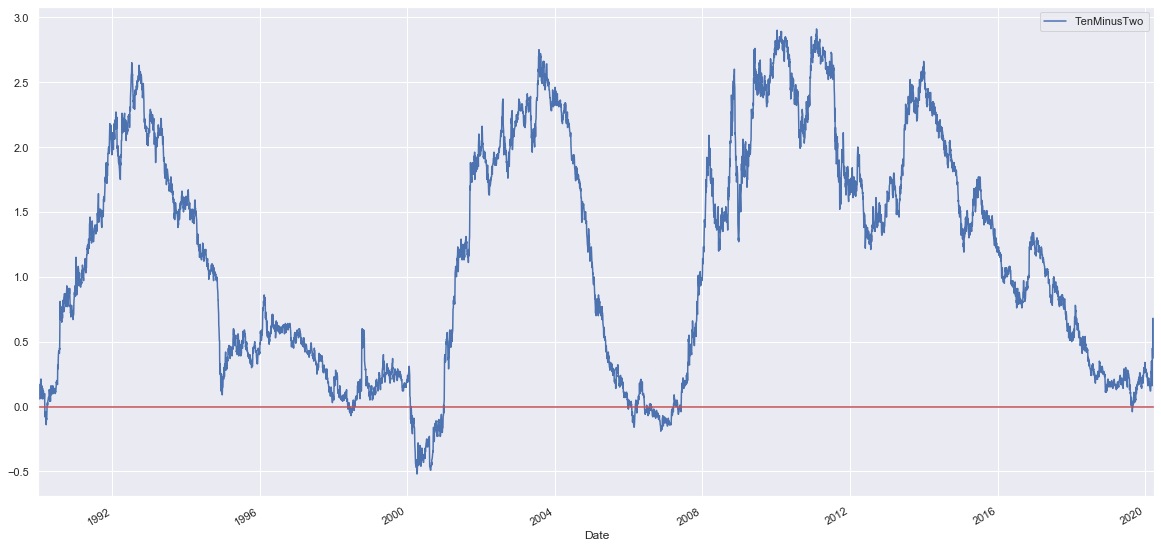

In [27]:
df_treasuryRates.plot(figsize=(20, 10))
plt.axhline(0, color="r");

## Europe Economic Sentiment

In [28]:
df_esi = quandl.get("ECBCS/ESI_ALL_MS_EU", authtoken="kFwyRwmqZyPsHBzdpNov")
df_esi = df_esi[::-1]
df_esi = df_esi[:num_months]
df_esi.head()

,Industrial confidence indicator (40%),Services confidence indicator (30 %),Consumer confidence indicator (20%),Retail trade confidence indicator (5%),Construction confidence indicator (5%),The Economic sentiment indicator is a composite measure (average = 100)
Date,,,,,,
2019-06-30,-5.9,7.0,-6.9,-0.3,3.2,102.3
2019-05-31,-3.6,7.4,-6.2,1.0,2.3,103.8
2019-04-30,-3.9,8.7,-7.3,1.1,2.4,103.6
2019-03-31,-1.4,8.1,-6.8,1.6,3.7,105.1
2019-02-28,-0.2,7.2,-6.8,0.5,4.5,105.3


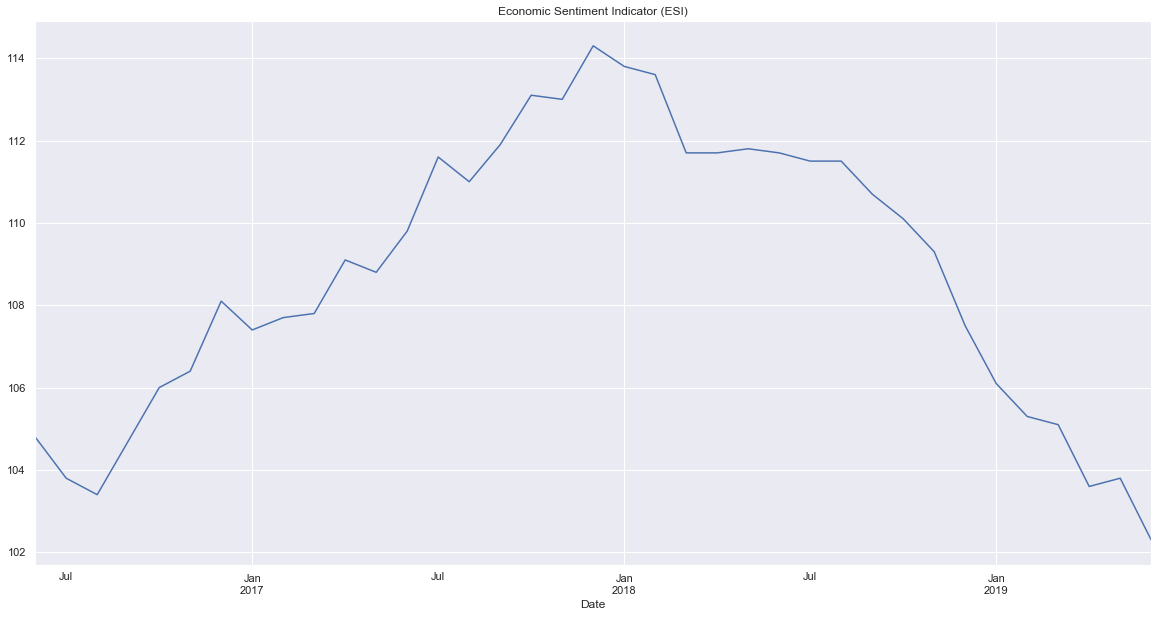

In [29]:
plt.title('Economic Sentiment Indicator (ESI)')
df_esi['The Economic sentiment indicator is a composite measure (average = 100)'].plot(figsize=(20, 10));

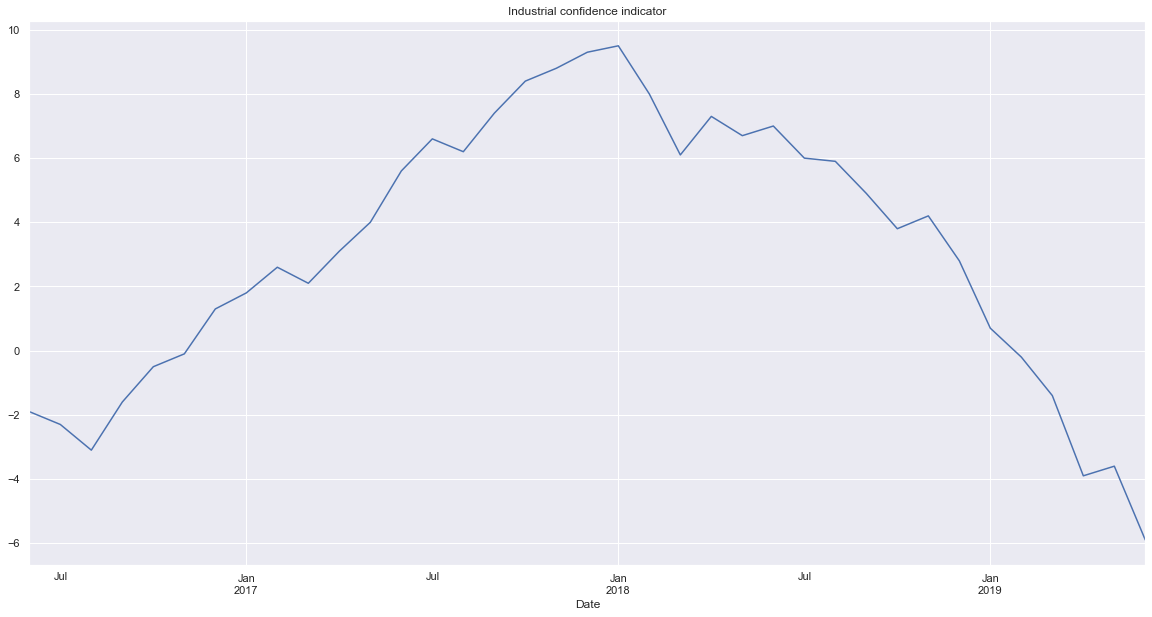

In [30]:
plt.title('Industrial confidence indicator')
df_esi['Industrial confidence indicator (40%)'].plot(figsize=(20, 10));

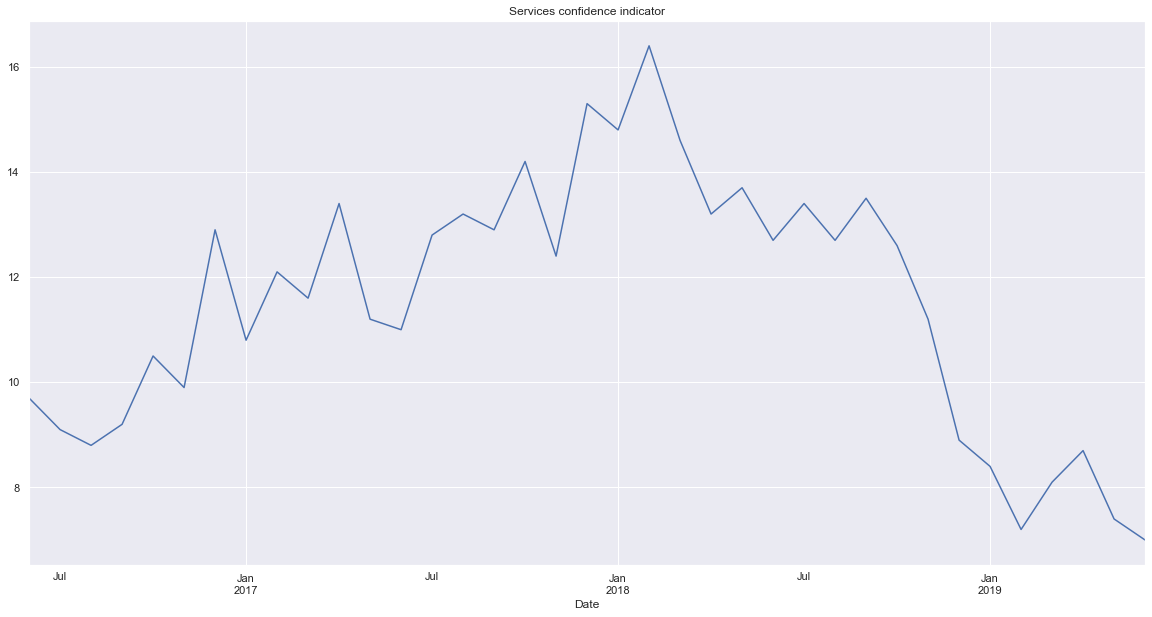

In [31]:
plt.title('Services confidence indicator')
df_esi['Services confidence indicator (30 %)'].plot(figsize=(20, 10));

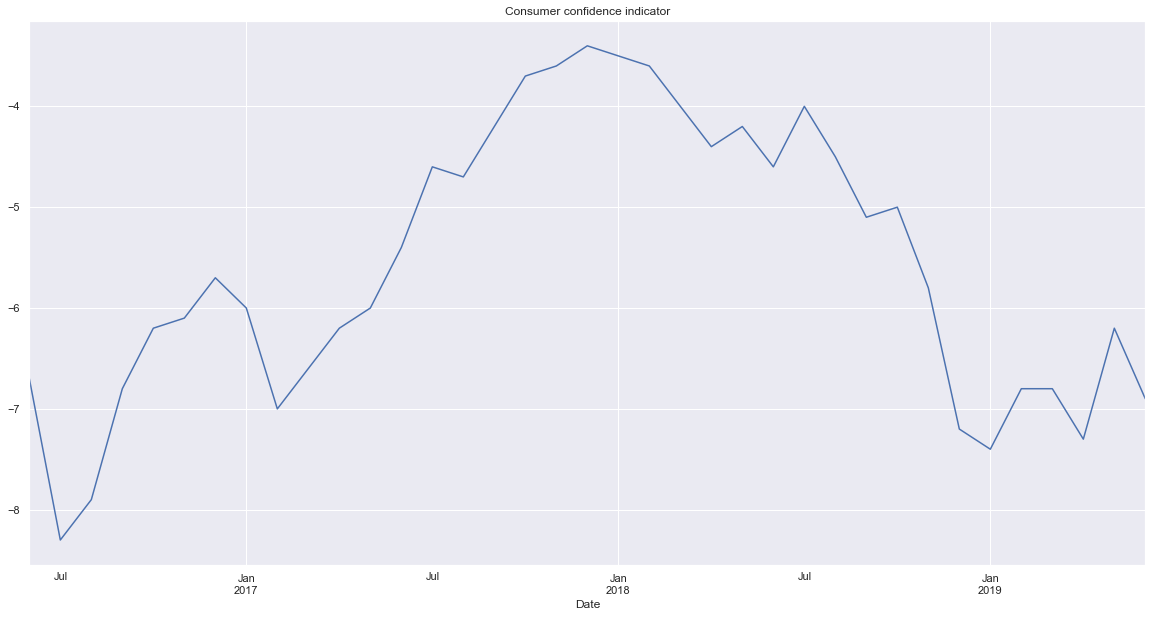

In [32]:
plt.title('Consumer confidence indicator')
df_esi['Consumer confidence indicator (20%)'].plot(figsize=(20, 10));

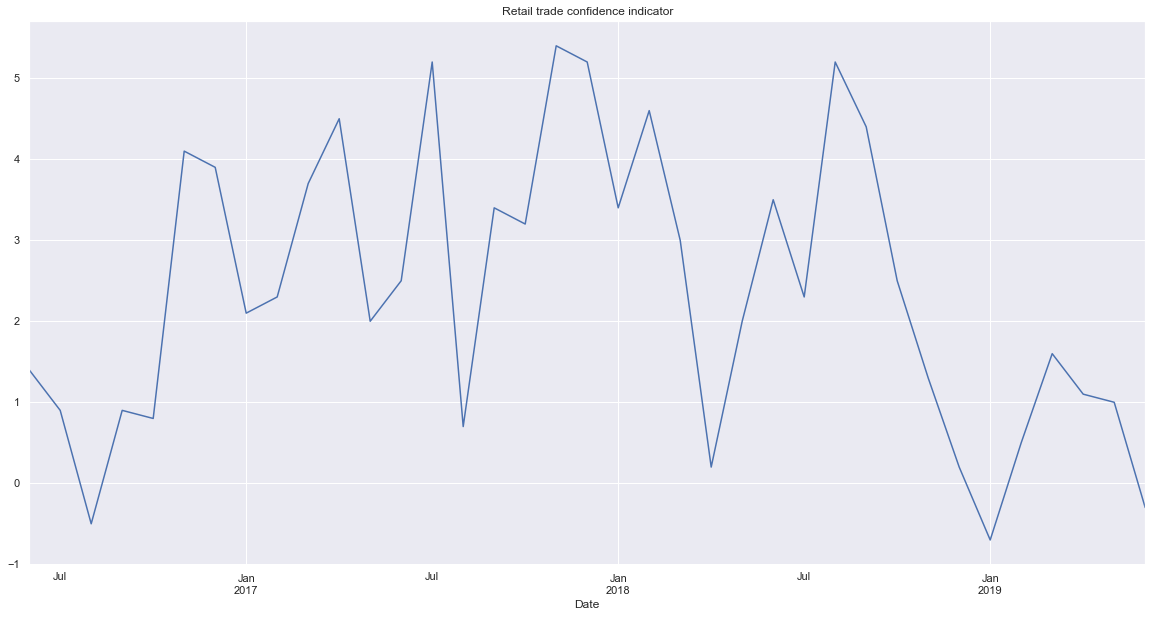

In [33]:
plt.title('Retail trade confidence indicator')
df_esi['Retail trade confidence indicator (5%)'].plot(figsize=(20, 10));

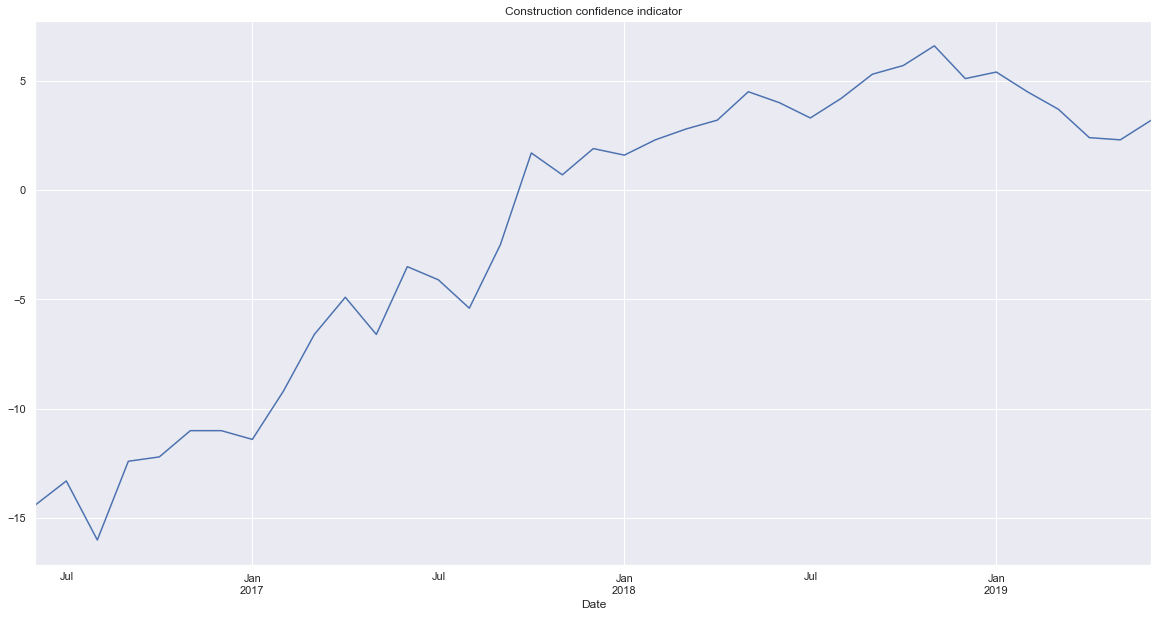

In [34]:
plt.title('Construction confidence indicator')
df_esi['Construction confidence indicator (5%)'].plot(figsize=(20, 10));

## Stock View

In [35]:
#Long Stock
df_long = web.DataReader(Long_Numerator, 'yahoo', start, end)
df_long = df_long[::-1]
df_long.rename(columns={'Adj Close': Long_Numerator}, inplace=True)
df_long.drop(['Close', 'Volume'], 1, inplace=True)
df_long['True_Range'] = df_long['High'] - df_long['Low']

#Short Stock
df_short = web.DataReader(Short_Denominator, 'yahoo', start, end)
df_short = df_short[::-1]
df_short.rename(columns={'Adj Close': Short_Denominator}, inplace=True)
df_short.drop(['Close', 'Volume'], 1, inplace=True)
df_short['True_Range'] = df_short['High'] - df_short['Low']

### Average True Range

In [36]:
df_long['1d'] = df_long['True_Range']
for i in range(df_long.shape[0] - 1):
    df_long['1d'][i] = (((df_long['True_Range'][i] + df_long['True_Range'][i+1]) / 2) / df_long['Open'][i+1])

df_short['1d'] = df_short['True_Range']
for i in range(df_long.shape[0] - 1):
    df_short['1d'][i] = (((df_short['True_Range'][i] + df_short['True_Range'][i+1]) / 2) / df_short['Open'][i+1])
    
df_long.head(10)

,High,Low,Open,JPM,True_Range,1d
Date,,,,,,
2020-04-02,87.769096,82.970001,83.510002,86.699997,4.799095,0.047644
2020-04-01,86.559998,83.250000,85.099998,84.360001,3.309998,0.044215
2020-03-31,94.169998,89.339996,92.050003,90.029999,4.830002,0.053061
2020-03-30,94.089996,89.300003,90.650002,93.500000,4.789993,0.048718
2020-03-27,94.839996,90.550003,93.190002,91.129997,4.289993,0.049532
2020-03-26,98.570000,93.540001,94.080002,98.120003,5.029999,0.087629
2020-03-25,95.150002,84.540001,89.239998,91.730003,10.610001,0.104888
2020-03-24,90.099998,82.900002,84.900002,88.430000,7.199997,0.077770
2020-03-23,83.750000,78.089996,82.680000,79.029999,5.660004,0.073233


In [37]:
ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_long['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_long['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_long['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_long['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_long['1d'][i]
    
print(Long_Numerator, " Average True Range")
print("5d ATR:\t\t", ATR_5d/5)
print("20d ATR:\t", ATR_20d/20)
print("60d ATR:\t", ATR_60d/60)
print("250d ATR:\t", ATR_250d/250)
print("750d ATR:\t", ATR_750d/750, '\n')

ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_short['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_short['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_short['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_short['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_short['1d'][i]
    
print(Short_Denominator, " Average True Range")
print("5d ATR:\t\t", ATR_5d/5)
print("20d ATR:\t", ATR_20d/20)
print("60d ATR:\t", ATR_60d/60)
print("250d ATR:\t", ATR_250d/250)
print("750d ATR:\t", ATR_750d/750)

JPM  Average True Range
5d ATR:		 0.048634131257889346
20d ATR:	 0.07950371409559515
60d ATR:	 0.03974028434309829
250d ATR:	 0.020330450615983004
750d ATR:	 0.017784629609435092 

BAC  Average True Range
5d ATR:		 0.05672299793749177
20d ATR:	 0.0852240061490984
60d ATR:	 0.04244894957186706
250d ATR:	 0.023051774013943475
750d ATR:	 0.020372879299986525


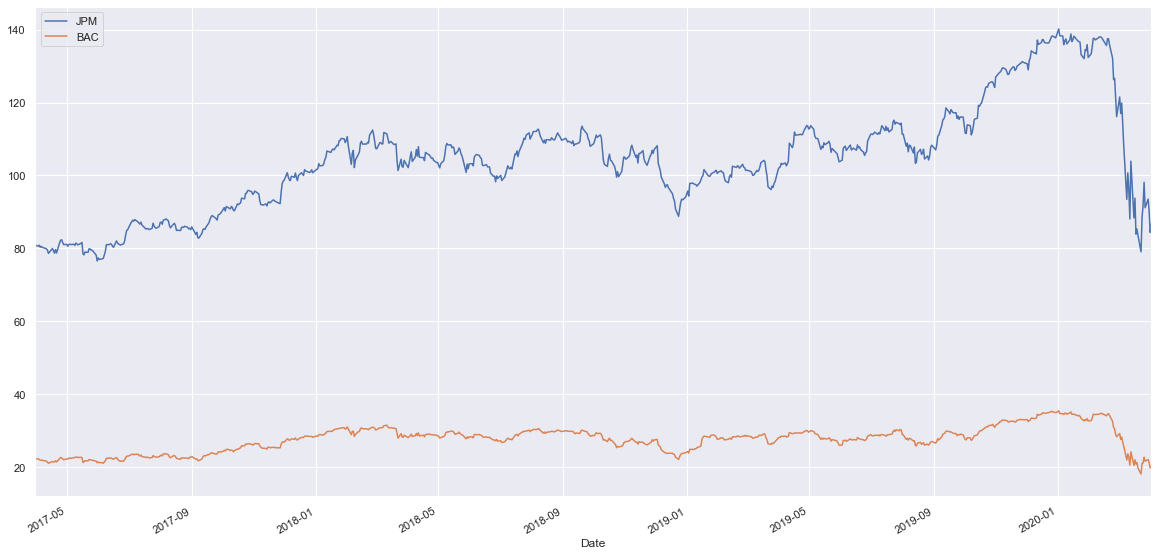

In [38]:
df_long.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)
df_short.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)

# Ratio and Graph
df_ratio = df_long.merge(df_short, left_on='Date', right_on='Date')

df_ratio.plot(figsize=(20, 10));

### Beta Hedge

In [39]:
df = df_ratio.merge(df_SP500, left_on='Date', right_on='Date')
df.rename(columns={'SP500': 'SPY'}, inplace=True)

stock_return = df.apply(lambda x: x / x[0])
stock_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end)
rrf = tbill.iloc[-1, 0]    # Get the most recent Treasury Bill rate
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)

sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()

ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf

beta = smcorr * sy / sx
alpha = ybar - beta * xbar

In [40]:
long_beta = beta[Long_Numerator]
short_beta = beta[Short_Denominator]
# Note: both betas are calculated based on the dates specified at the top
print('Long beta (',Long_Numerator,'): ',long_beta) 
print('Short beta (',Short_Denominator,'):',short_beta)

Long beta ( JPM ):  1.2135623258731862
Short beta ( BAC ): 1.3236051644257953


In [41]:
df_ratio['Ratio'] = (df_ratio[Long_Numerator] / long_beta) / (df_ratio[Short_Denominator] / short_beta)
df_ratio = df_ratio[::-1]
df_ratio.drop([Long_Numerator, Short_Denominator], 1, inplace=True)

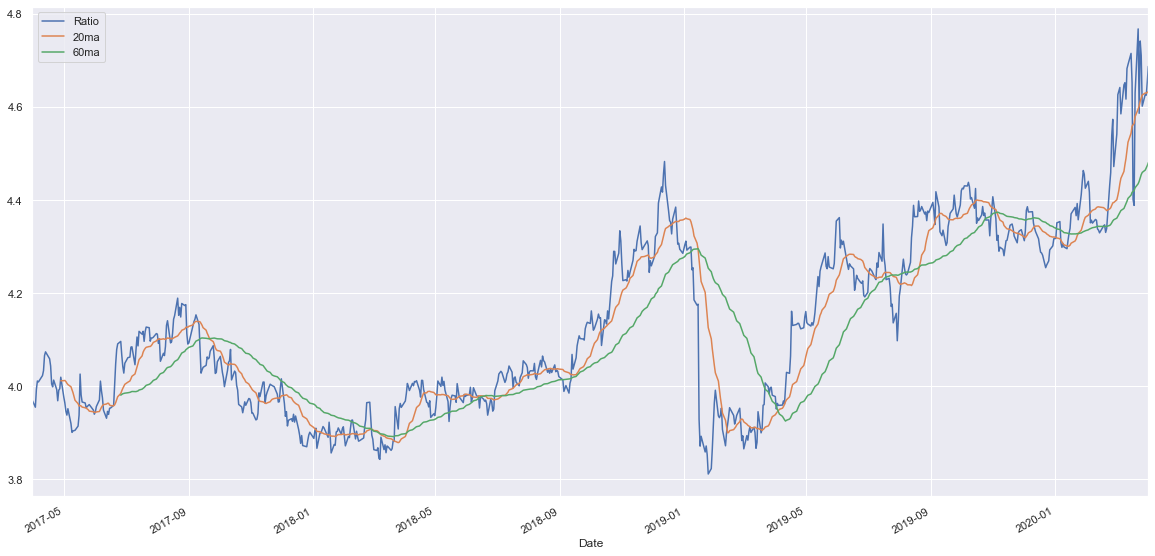

In [42]:
df_ratio['20ma'] = df_ratio['Ratio'].rolling(window=20).mean()
df_ratio['60ma'] = df_ratio['Ratio'].rolling(window=60).mean()

df_ratio.plot(figsize=(20, 10));